In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the dataset to python environment


In [2]:
data=pd.read_excel("/content/iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Do the necessary pre-processing steps


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Finding and filling missing values

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data['SL'].fillna(method='ffill',inplace=True)
data['SW'].fillna(method='ffill',inplace=True)
data['PL'].fillna(method='ffill',inplace=True)

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

checking and handling outliers

In [10]:
num_columns=['SL', 'SW', 'PL', 'PW']

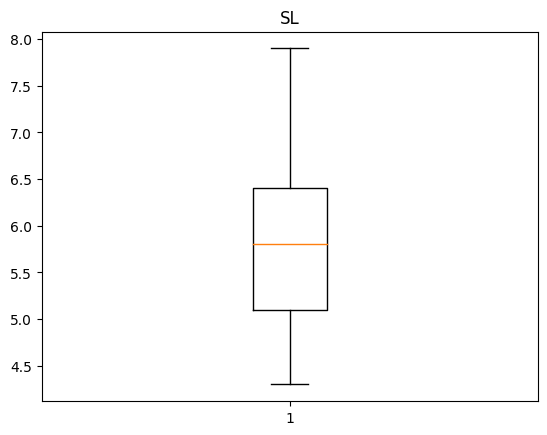

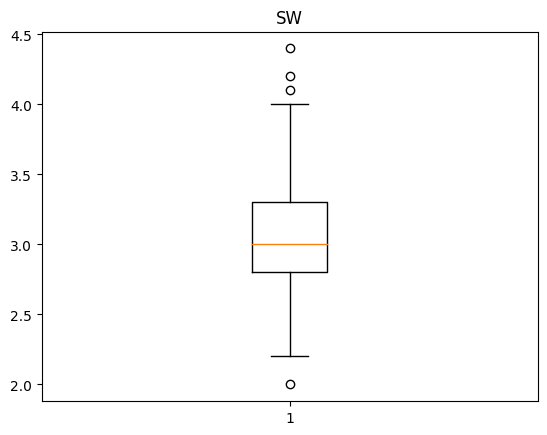

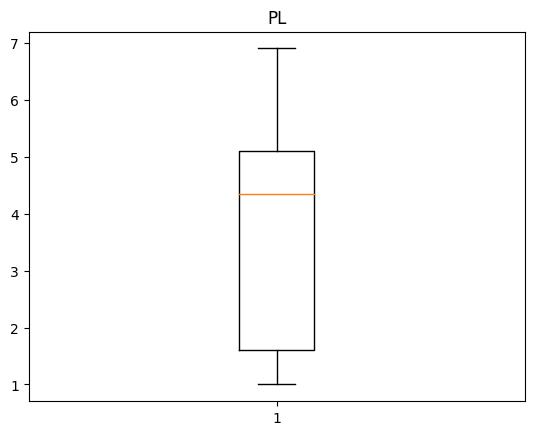

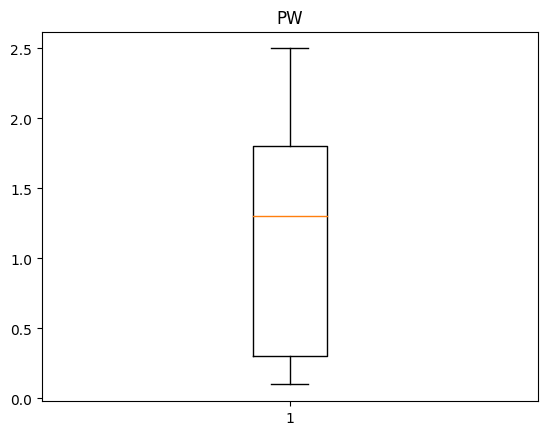

In [11]:
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [12]:
Q1 = np.percentile(data['SW'],25,method='midpoint')
Q2 = np.percentile(data['SW'],50,method='midpoint')
Q3 = np.percentile(data['SW'],75,method='midpoint')

In [13]:
print('Q1 is', Q1)
print('Q2 is', Q2)
print('Q3 is', Q3)

Q1 is 2.8
Q2 is 3.0
Q3 is 3.3


In [14]:
IQR =Q3 - Q1


low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('min is', low_lim)
print('max is', up_lim)

min is 2.05
max is 4.05


In [15]:
outlier = []
for x in data['SW']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [16]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [17]:
ind2= data['SW']<low_lim
data.loc[ind2].index


Int64Index([60], dtype='int64')

In [18]:
data.drop(data.loc[ind1].index,inplace=True)
data.drop(data.loc[ind2].index,inplace=True)
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
data['Classification']=le.fit_transform(data['Classification'])

In [51]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.9,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


3. Find out which classification model gives the best result

Logistic regression

In [23]:
y = data['Classification']
x=data.drop(['Classification'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split



In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [27]:
model=lr.fit(x_train,y_train)

In [28]:
y_predictions=model.predict(x_test)
y_predictions

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [30]:
confusion_matrix(y_test,y_predictions)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [31]:
print('Accuracy =' , accuracy_score(y_test,y_predictions))


Accuracy = 0.9333333333333333


KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metric_k=[]
neighbors=np.arange(3,15)

In [34]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [35]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667]

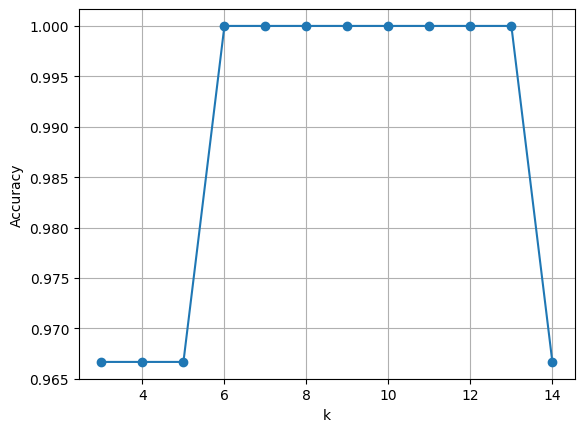

In [36]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()


In [37]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [38]:
print('Accuracy =' , accuracy_score(y_test,y_predictions))



Accuracy = 0.9333333333333333


SVC

In [39]:
from sklearn.svm import SVC

In [40]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [41]:
confusion_matrix(y_test,y_pred_svm)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

In [42]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_cls=DecisionTreeClassifier()
model=dt_cls.fit(x_train,y_train)
y_pred_dt=model.predict(x_test)

In [45]:
confusion_matrix(y_test,y_pred_dt)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [46]:
accuracy_score(y_test,y_pred_dt)

0.9333333333333333

Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_cls = RandomForestClassifier()
model_rf = rf_cls.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)


In [49]:
confusion_matrix(y_test,y_pred_rf)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [50]:
accuracy_score(y_test,y_pred_rf)

0.9333333333333333